# Predicting used car prices

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Import dataset

In [2]:
data = pd.read_csv(r"C:\Users\manit\OneDrive\Documents\GitHub\used-vehicle-price-prediction-data-secience\dataset.csv")
data.sample(8)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2733,2733,Maruti Swift Dzire ZXI,Jaipur,2017,37282,Petrol,Manual,First,20.85 kmpl,1197 CC,83.14 bhp,5.0,NaN,6.75
5435,5435,Honda City i DTEC VX,Chennai,2014,71000,Diesel,Manual,Second,25.1 kmpl,1498 CC,98.6 bhp,5.0,NaN,6.20
1010,1010,Ford Ecosport Signature Edition Diesel,Coimbatore,2019,23154,Diesel,Manual,First,23.0 kmpl,1498 CC,98.96 bhp,5.0,12.12 Lakh,11.65
1600,1600,Honda City i VTEC SV,Kochi,2016,36367,Petrol,Manual,First,17.8 kmpl,1497 CC,117.3 bhp,5.0,NaN,7.73
1227,1227,BMW 3 Series 328i Sport Line,Pune,2013,49000,Petrol,Automatic,First,14.59 kmpl,1997 CC,245 bhp,5.0,NaN,19.00
3936,3936,Volkswagen Vento Diesel Highline,Pune,2013,95500,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.00
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,15.50
5277,5277,Maruti Alto 800 LXI,Jaipur,2017,30000,Petrol,Manual,First,22.74 kmpl,796 CC,47.3 bhp,5.0,NaN,3.10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


## Data Cleaning 
* missingno is a quick and easy way used to visualize missing values in the datasets
* using dropna to remove the null valued records from the datasets

<Axes: >

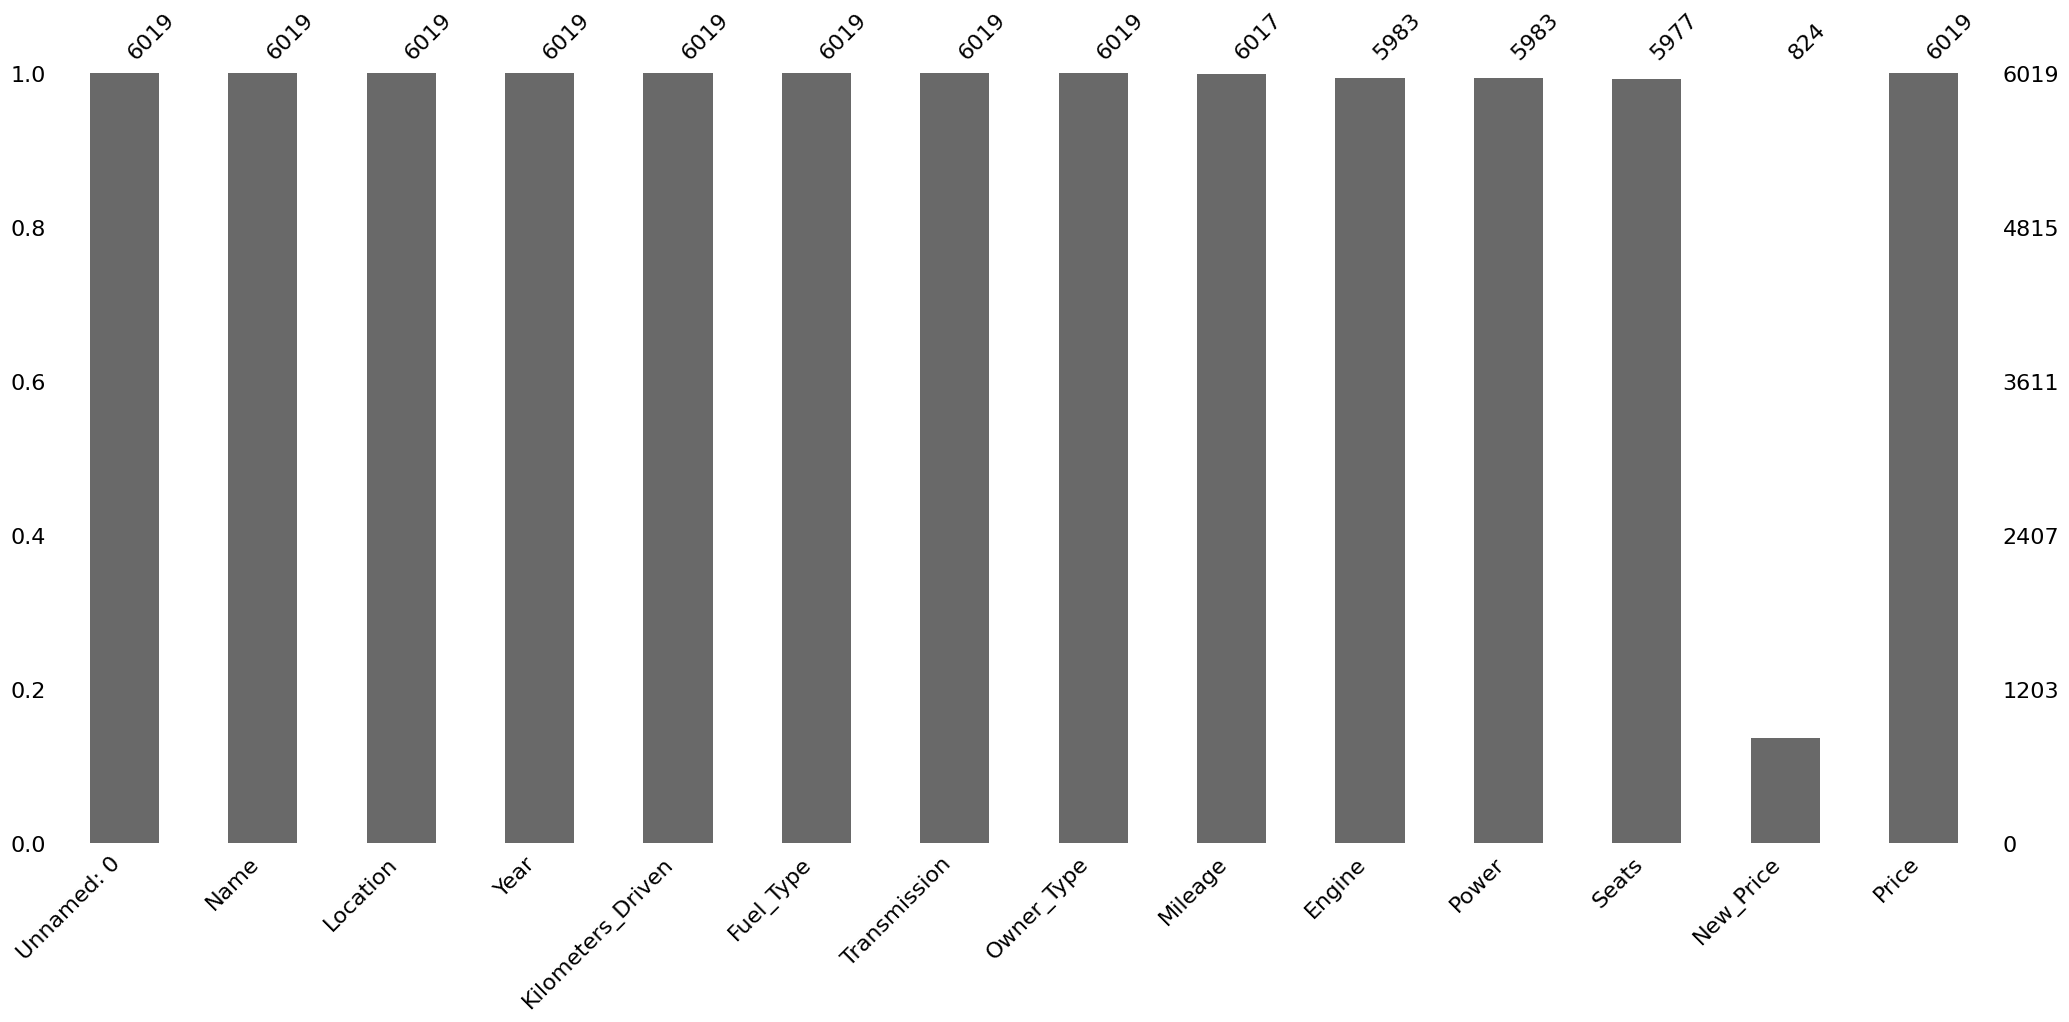

In [4]:
import missingno as msno
msno.bar(data)

In [5]:
data.shape

(6019, 14)

**as the new_price column has many null values we are going to drop that column**

In [6]:
data = data.drop("New_Price", axis=1)
data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [7]:
data.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
data = data.dropna()
data.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

## Test Train Split
* 70% as train data and 30% as test data
* training data is used to train the machine learning models and test data is used to check the accuracy of the model

In [9]:
X_train, X_test, ytrain, ytest = train_test_split(data.iloc[:, :-1], 
                                                    data.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)
# iloc[:, :-1] selects the column except the last 
# iloc[:, -1] selects the last column

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 5333 to 865
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4182 non-null   int64  
 1   Name               4182 non-null   object 
 2   Location           4182 non-null   object 
 3   Year               4182 non-null   int64  
 4   Kilometers_Driven  4182 non-null   int64  
 5   Fuel_Type          4182 non-null   object 
 6   Transmission       4182 non-null   object 
 7   Owner_Type         4182 non-null   object 
 8   Mileage            4182 non-null   object 
 9   Engine             4182 non-null   object 
 10  Power              4182 non-null   object 
 11  Seats              4182 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 424.7+ KB


In [11]:
# y_train holds the training data to which the test model needs to be trained for better accuracy
ytrain

5333     6.11
1822     4.70
2638     2.90
2931     4.30
5151     3.90
        ...  
3799    26.00
5233     4.90
5268     2.65
5433     4.01
865      0.70
Name: Price, Length: 4182, dtype: float64

## Pre-Processing and analyzing the data
* Let's explore the various columns and draw information about how useful each columns are

### Index

In [12]:
# The first column is the index for each data point and hence we can simply remove it.
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [13]:
# the index numbers aren't considered for the prediction
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 5333 to 865
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4182 non-null   object 
 1   Location           4182 non-null   object 
 2   Year               4182 non-null   int64  
 3   Kilometers_Driven  4182 non-null   int64  
 4   Fuel_Type          4182 non-null   object 
 5   Transmission       4182 non-null   object 
 6   Owner_Type         4182 non-null   object 
 7   Mileage            4182 non-null   object 
 8   Engine             4182 non-null   object 
 9   Power              4182 non-null   object 
 10  Seats              4182 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 392.1+ KB


### Name
**Let's explore the various cars in the dataset**

In [14]:
X_train["Name"].value_counts()

Mahindra XUV500 W8 2WD              34
Honda City 1.5 S MT                 26
Maruti Swift VDI                    26
Honda Amaze S i-Dtech               24
Toyota Fortuner 3.0 Diesel          24
                                    ..
Lamborghini Gallardo Coupe           1
Mahindra Jeep MM 540 DP              1
Porsche Cayenne 2009-2014 Diesel     1
Tata Zest Quadrajet 1.3              1
Maruti Ritz VDI (ABS) BS IV          1
Name: Name, Length: 1539, dtype: int64

* we can say that there are several cars in the dataset, some of them with a count > 1
* the resale value of the car may also depend upon the manufacturers. So let's extract the manufacturer from this column and add it to the dataset.

#### from the test-train data we extract the manufactures' data

In [15]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)
make_train[0]

5333           Maruti
1822         Mahindra
2638           Maruti
2931            Honda
5151       Volkswagen
            ...      
3799    Mercedes-Benz
5233           Maruti
5268          Hyundai
5433          Hyundai
865            Maruti
Name: 0, Length: 4182, dtype: object

In [16]:
# make_train[0] will have list of car names, using this data we create a new column manufacturers
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]
X_train.sample(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
5077,Honda City i VTEC SV,Mumbai,2014,10500,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,Honda
3296,Honda Jazz 1.2 S i VTEC,Mumbai,2015,31000,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,Honda
3877,Maruti Swift Ldi BSIII,Hyderabad,2008,76206,Diesel,Manual,First,17.8 kmpl,1248 CC,75 bhp,5.0,Maruti
2695,Ford Figo Diesel EXI,Hyderabad,2010,108882,Diesel,Manual,Second,20.0 kmpl,1399 CC,68 bhp,5.0,Ford


**Let's also confirm that there are no null values and identify all unique values**

Text(0, 0.5, 'Count of cars')

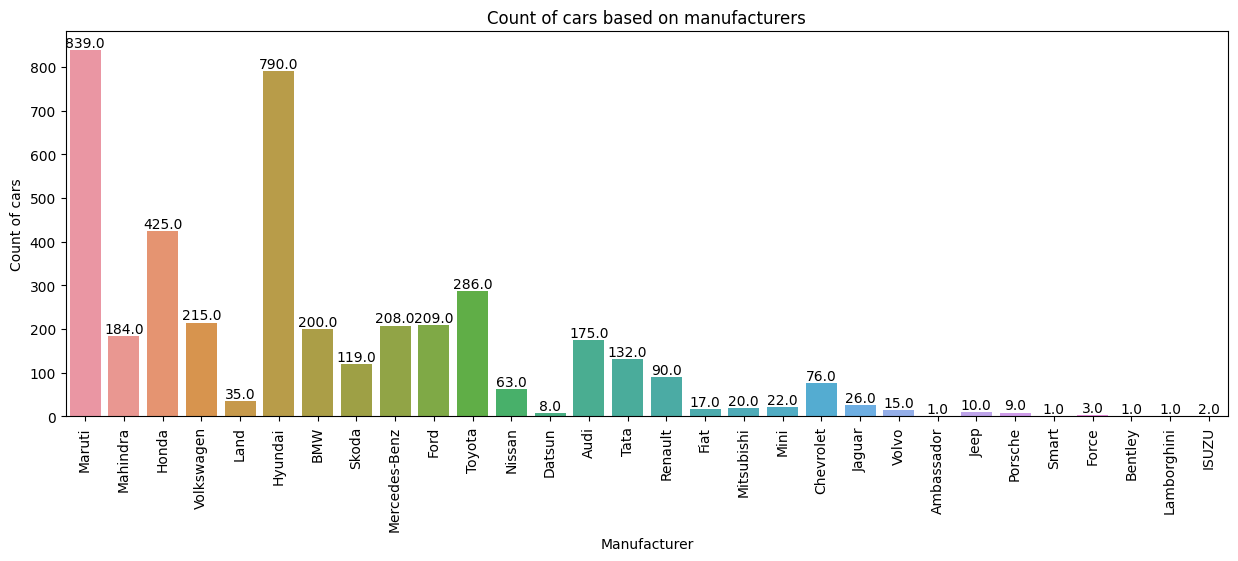

In [17]:
plt.figure(figsize = (15, 5))
plot = sns.countplot(x = 'Manufacturer', data = X_train)

for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

# labels
plt.xticks(rotation = 90) 
plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

* from the above plot we can infer that Maximum cars in the dataset are by the manufactured **Maruti**
* Let's drop the `Name` column, as it's not required further in our prediction

In [18]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

X_train.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
899,Pune,2018,17000,Petrol,Automatic,First,19.16 kmpl,2494 CC,158.2 bhp,5.0,Toyota
4063,Coimbatore,2015,60146,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,Audi
5867,Mumbai,2017,35000,Diesel,Automatic,First,18.19 kmpl,1968 CC,174.5 bhp,5.0,Skoda
3336,Jaipur,2013,75049,Petrol,Manual,Second,20.36 kmpl,1197 CC,78.9 bhp,5.0,Hyundai
3783,Pune,2010,128000,Diesel,Manual,Second,14.42 kmpl,1995 CC,147.6 bhp,5.0,Nissan


### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [19]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [20]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

# as the price may vary with respect to the age of the car, so we calculate how much old the car is

X_train.sample(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
5570,11,80000,Diesel,Manual,First,19.72 kmpl,1461 CC,108.45 bhp,5.0,Renault
4014,10,73212,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,Maruti
5648,10,120005,Diesel,Manual,First,21.64 kmpl,1461 CC,84.8 bhp,5.0,Nissan
615,6,52000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,8.0,Toyota
3876,14,65462,Petrol,Automatic,Third,11.1 kmpl,2354 CC,142 bhp,5.0,Honda


## Mileage

We need to extract the numerical value out of each string and save it in the column, as the units of the data aren't required fot our analysis

In [21]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')
mileage_train[0] # consists of the value of mileage of the cars

5333    20.77
1822    25.32
2638     26.2
2931     18.0
5151    22.07
        ...  
3799    14.21
5233     23.2
5268     17.0
5433    19.81
865      17.3
Name: 0, Length: 4182, dtype: object

Let's check for missing values.

In [22]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


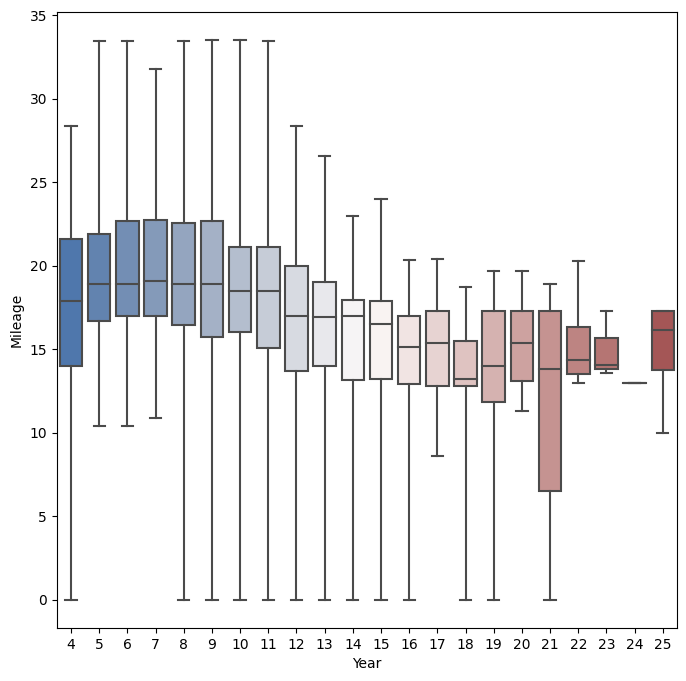

In [23]:
# Mileage vs age of the car
plt.figure(figsize=(8,8))
ml = X_train["Mileage"]
yr = X_train["Year"]
sns.boxplot(x=yr, y=ml, data=data,
            whis=[0, 100], width=.8, palette="vlag")
plt.show()

### Engine, Power and Seats
* Removing the units of the recorded data, as they aren't needed for our prediction
* The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so remove `bhp` from it.

In [24]:
X_train.sample(3)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
2435,7,61823,Petrol,Manual,First,18.6,1197 CC,81.83 bhp,5.0,Hyundai
3507,11,155566,Diesel,Manual,Second,9.5,2835 CC,118.6 bhp,6.0,Mitsubishi
3723,8,63714,Petrol,Manual,First,24.7,796 CC,47.3 bhp,5.0,Maruti


In [25]:
# value of engine volume value is extracted, as we dont want the units
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)

# now we convert the dataframe into series, and updating the engine column
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

# similarly we do it for power column
bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)

X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

X_train.head(3)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
5333,11,63001,Diesel,Manual,Second,20.77,1248,88.76,7.0,Maruti
1822,6,10500,Diesel,Manual,First,25.32,1198,77.00,5.0,Mahindra
2638,11,90400,CNG,Manual,First,26.20,998,58.20,5.0,Maruti


Now, filling the null values present in  `engine` , `power`, `seats`, columns with the mean of other data in the same column 

In [26]:
# filling the null valued data with the mean of other data in the same column
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

### Kilometers Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [27]:
X_train["Kilometers_Driven"]

5333     63001
1822     10500
2638     90400
2931     42000
5151    107023
         ...  
3799     30000
5233     75000
5268     28000
5433     34952
865     102000
Name: Kilometers_Driven, Length: 4182, dtype: int64

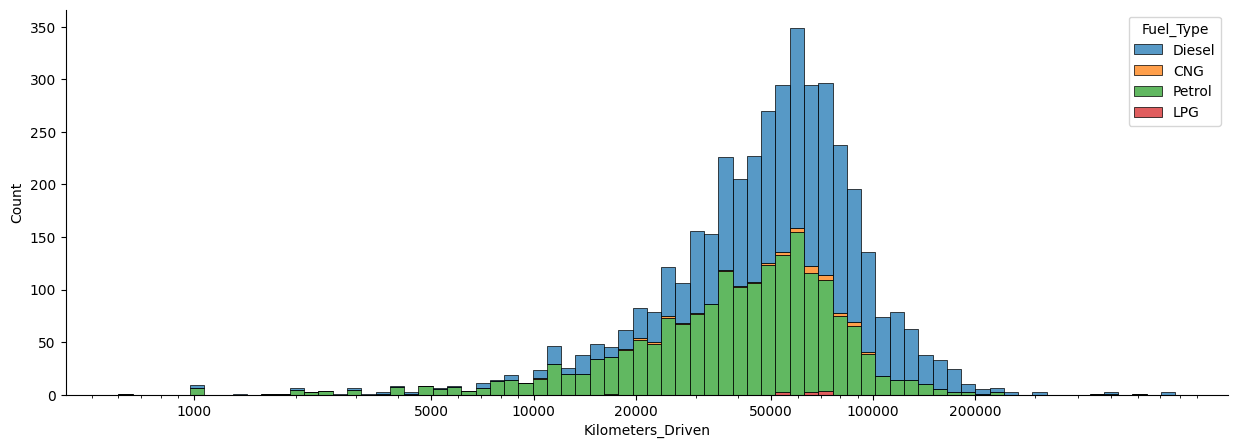

In [28]:
import matplotlib as mpl
kmd = X_train["Kilometers_Driven"]
ft = X_train["Fuel_Type"]
tr = X_train["Transmission"]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    X_train,
    x="Kilometers_Driven", hue="Fuel_Type",
    multiple="stack",
    linewidth=.5,
    log_scale=True,
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1000,5000,10000, 20000, 50000,100000, 200000])

* As the data range is really varied and the high values might affect prediction.
* thus, it is really important that scaling be applied to this column to make sure the data is balanced

## Data Processing

* Now that we have worked with the training data, let's create dummy columns for categorical columns using one-hot encoding before we begin training.
* **One hot encoding** is a technique that we use to represent **categorical variables as numerical values** in a machine learning model.

In [29]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
X_train.sample(5)

#the manufacturer column is categorized 

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,...,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4083,5,26731,21.10,998,100.00,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3847,12,70000,12.05,2179,120.00,8.0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3620,10,93000,20.50,1598,103.50,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
897,7,20487,22.70,799,53.64,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1855,12,100000,22.69,1995,190.00,5.0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


similarly we create the dummy columns for X_test data also

In [30]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
X_test.sample(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_BMW,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,...,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4154,11,62000,17.80,1248,75.00,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4831,9,25000,22.90,1248,74.00,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3153,9,57676,19.10,1197,85.80,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2106,8,110000,15.73,1968,174.33,5.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3191,8,48300,20.00,2143,107.30,5.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [31]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]


In [34]:
ytrain.isnull().sum()

0

## Training and predicting

`Standardizing the data`
* StandardScaler is a preprocessing technique used in machine learning to standardize the features of a dataset, to ensure the data are in same scale for modeling
* its done by removing the mean and scales each variable to unit variance

In [35]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

* so now we will create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions
* and compare the score of the two models

0.6975804373254642


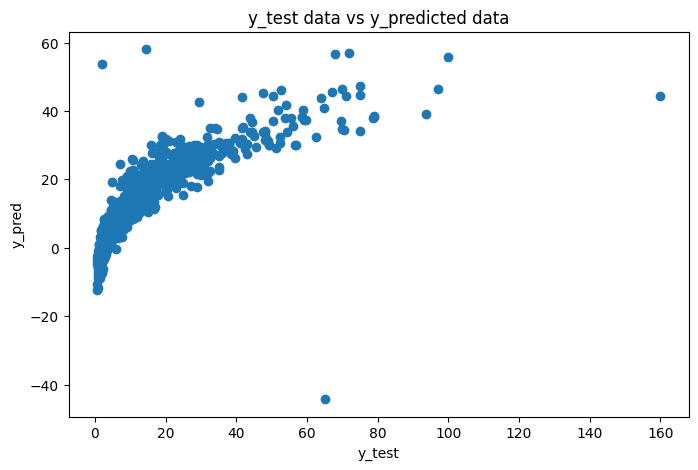

In [36]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, ytrain)
y_pred = linearRegression.predict(X_test)
# r2_score is a measurement done to check the goodness and fit of the model
# like how well the regression data approximates the actual data
print(r2_score(ytest, y_pred))


#labels
plt.figure(figsize=(8,5))
plt.title("y_test data vs y_predicted data")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(ytest, y_pred)

The `Linear regression` model performed the best with a R2 score of approx **0.697**

0.8676021558159818


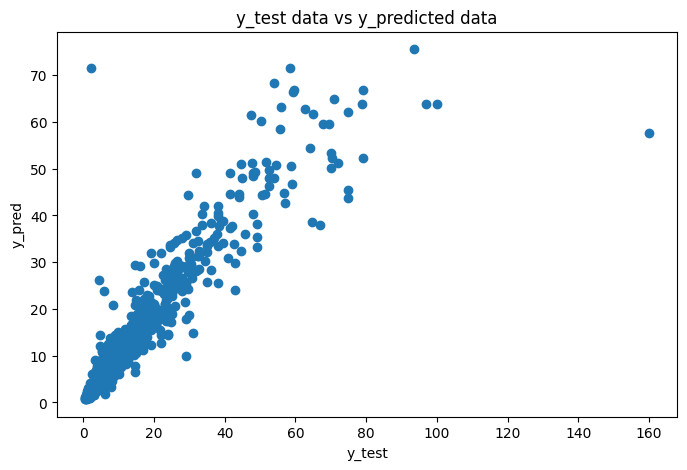

In [37]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, ytrain)
y_pred = rf.predict(X_test)
print(r2_score(ytest, y_pred))

#labels
plt.figure(figsize=(8,5))
plt.title("y_test data vs y_predicted data")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(ytest, y_pred)

The `Random Forest` model performed the best with a R2 score of approx **0.867**.